In [1]:
import numpy as np
import scipy.stats as st
from matplotlib import pyplot

In [6]:
def mandelbrot(iters, samples, x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5):
    
    max_iter = iters
    
    width, height = 800, 800
    mandelbrot_set = np.zeros((height, width))

    inside_count = 0

    for i in range(int(samples)):
        real = np.random.uniform(x_min, x_max)
        imag = np.random.uniform(y_min, y_max)
        c = complex(real, imag)
        z = 0.0j
        for j in range(max_iter):
            z = z*z + c
            if (z.real*z.real + z.imag*z.imag) >= 4:
                break
        if j == max_iter - 1:
            inside_count += 1
            x_pixel = int((real - x_min) * width / (x_max - x_min))
            y_pixel = int((imag - y_min) * height / (y_max - y_min))
            mandelbrot_set[y_pixel, x_pixel] = 1
    area_estimate = (inside_count / samples) * (x_max - x_min) * (y_max - y_min)

    return mandelbrot_set, area_estimate

# Problem 1

1.5500880000000001


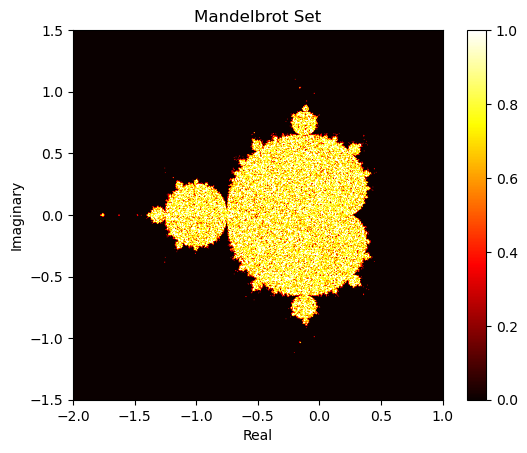

In [3]:
width, height = 800, 800
max_iter = 100

x_min, x_max = -2, 1
y_min, y_max = -1.5, 1.5

mandelbrot_set = np.zeros((height, width))

samples = 1000000

inside_count = 0

mandelbrot_set, mandelbrot_area = mandelbrot(max_iter, samples)

print(mandelbrot_area)

pyplot.imshow(mandelbrot_set, extent=(x_min, x_max, y_min, y_max), cmap="hot")
pyplot.colorbar()
pyplot.title("Mandelbrot Set")
pyplot.xlabel("Real")
pyplot.ylabel("Imaginary")
pyplot.savefig("fractal", dpi=300)

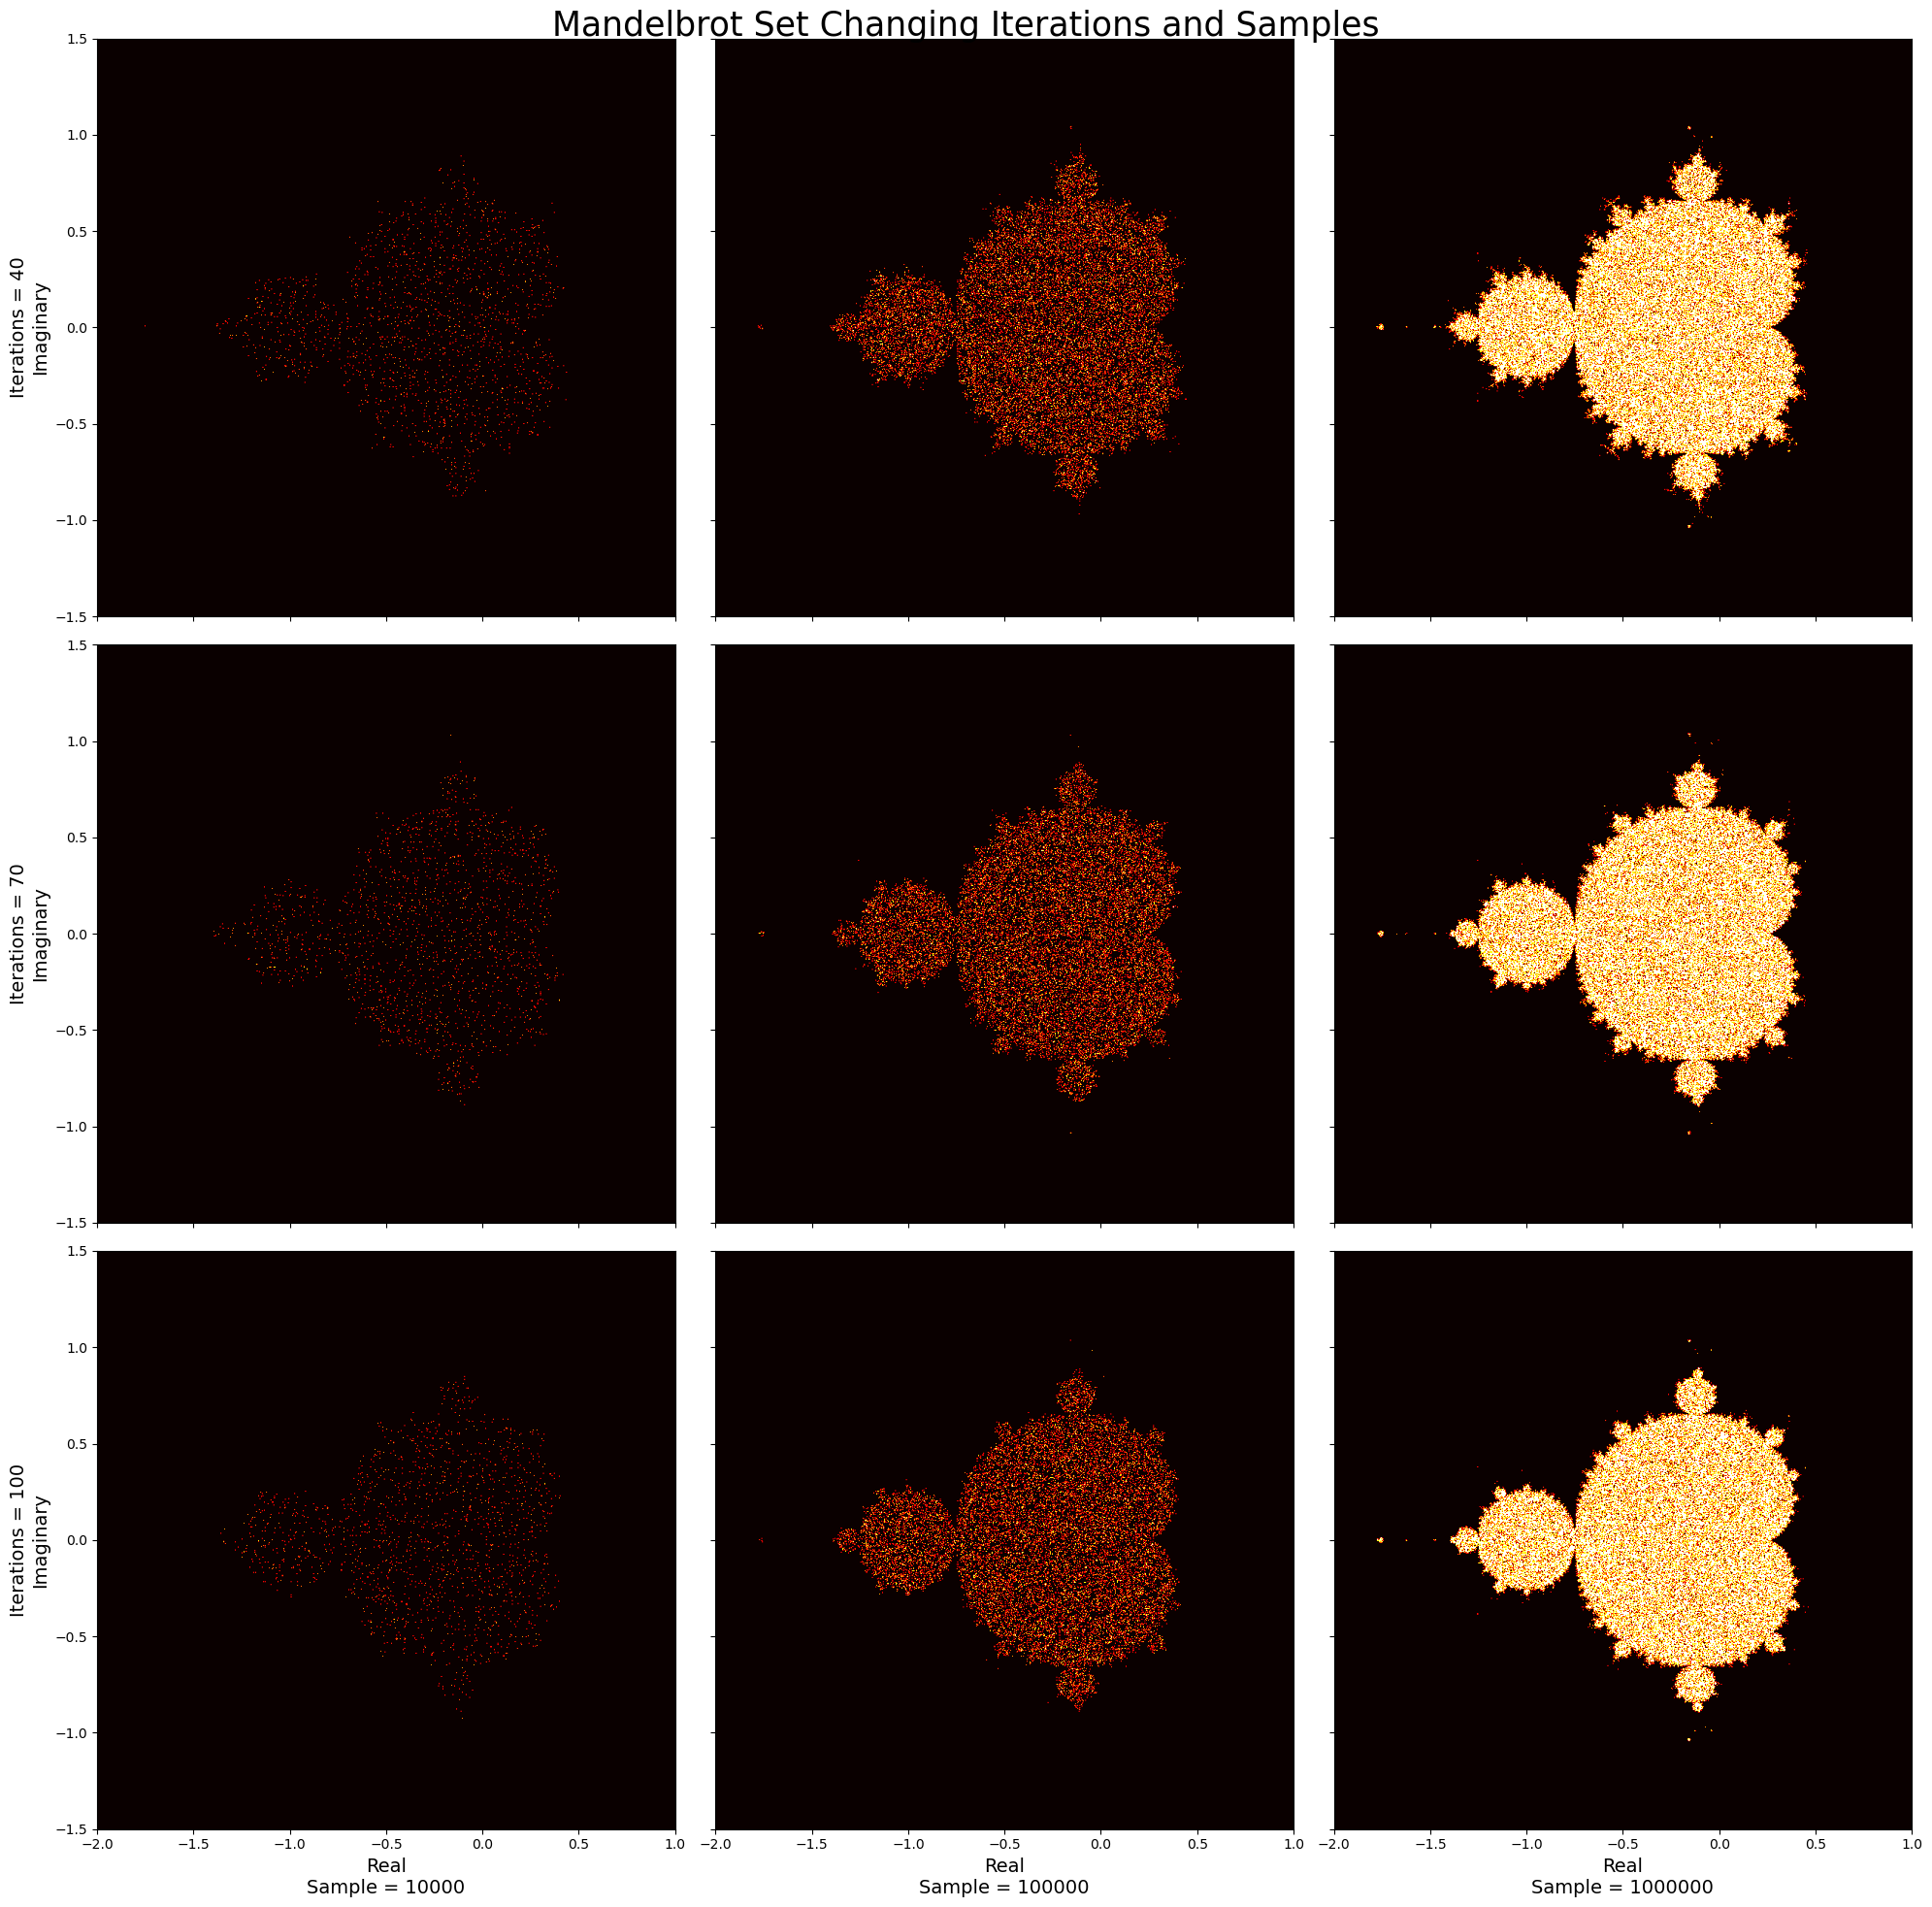

In [5]:
fig, axes = pyplot.subplots(3, 3,sharex=True,sharey=True,figsize=(20,20))

iter_list = [40, 70, 100]
sample_list = [1e4, 1e5, 1e6]

x_min, x_max = -2, 1
y_min, y_max = -1.5, 1.5

for iters in range(len(iter_list)):
    for sample in range(len(sample_list)):
        mandelbrot_set, _ = mandelbrot(iter_list[iters], sample_list[sample])
        axes[iters,sample].imshow(mandelbrot_set, extent=(x_min, x_max, y_min, y_max), cmap="hot")
        axes[2,sample].set_xlabel(f"Real\nSample = {int(sample_list[sample])}", fontsize=14)
        axes[iters,0].set_ylabel(f"Iterations = {iter_list[iters]}\nImaginary", fontsize=14)

fig.suptitle("Mandelbrot Set Changing Iterations and Samples", fontsize=25)
pyplot.tight_layout()
pyplot.savefig("sub_fractal", dpi=300)